In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data-export (1).csv')

In [3]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# 1.preprocessing of imported data

In [4]:
df.columns = df.iloc[0]
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [5]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["channel group", "DateHour", "Users",	"Sessions",	"Engaged sessions",	"Average engagement time per session", "Engaged sessions per user", "Events per session", "Engagement rate", "Event count"]
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [15]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')  #converting object to datetime format
numeric_cols = df.columns.drop(["channel group", "DateHour"])   
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')     #except channel group and datehour columns changing other columns to numeric from object
df["Hour"] = df["DateHour"].dt.hour   #creates seperate column of hour


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [9]:
df.head()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [10]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


In [16]:
df_cleaned = df.copy()
df_cleaned.to_csv('website_performence_cleaned_data.csv', index=False)

# 2. solving problem statements

#1).what patterns or trends can you observe in website sessions and users over time ?

In [18]:
sns.set(style="whitegrid")

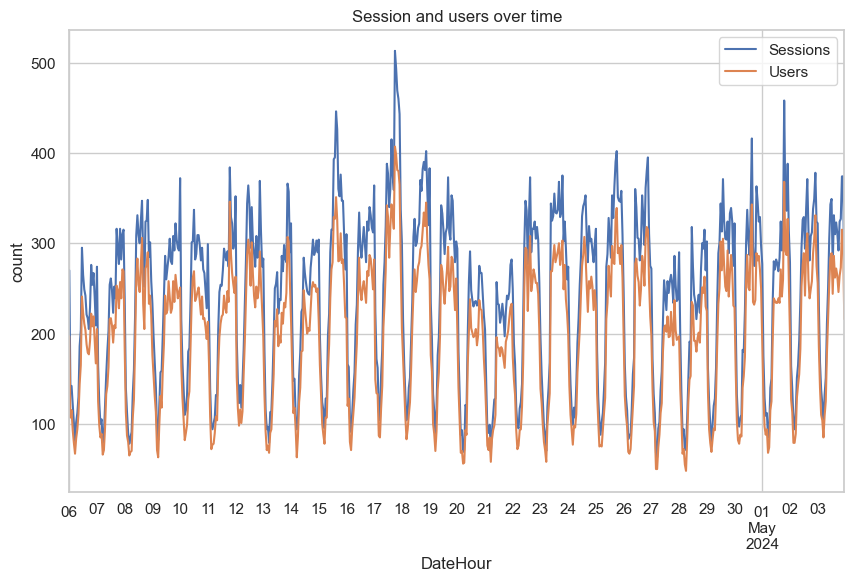

In [23]:
plt.figure(figsize=(10,6))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Session and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

#ANALYSIS OVERVIEW : This indicates a consistent traffic surge during late afternoon, likely due to post-work/school and/or Most high-traffic days during this hour fall on weekdays — likely user browsing after work.

#Performance Focus: Ensure landing pages during these peak hours on high-traffic dates are:

#1.Optimized for speed

#2.Designed for conversions

#3.Monitored for any slowdowns 

#2. Which marketing channel brought the highest number of users to the website, & how can we use this insight to improve traffic from other sources?. 

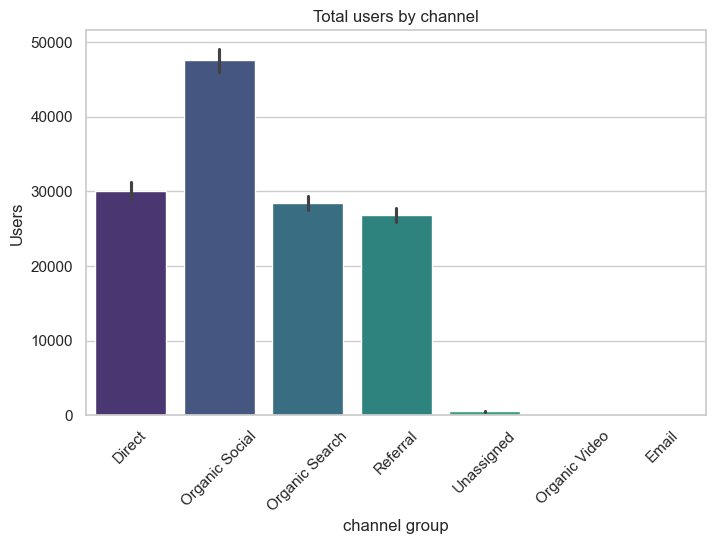

In [26]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, hue="channel group", palette="viridis", legend=False)
plt.title("Total users by channel")
plt.xticks(rotation=45)
plt.show()

#Revive or Boost Low-Performing Channels i.e.,address Unassigned, Organic Video, and Gmail traffic channels:

#🚫 Unassigned:This usually means:Missing UTM tags or misconfigured tracking.
     #Fix: Audit all incoming traffic sources (especially email, ads, social) and add UTM parameters.

#📉 Organic Video:Likely from platforms like YouTube, Instagram Reels, etc. Low traffic here might mean:You're not active on video platforms OR Videos aren’t linking to your site properly.

    #Improve by:a).Creating engaging videos (how-tos, behind-the-scenes, testimonials).b).Always include website links in video descriptions and pinned comments. c).Use YouTube cards, end screens, and CTAs to drive clicks. d).Repurpose blog posts into short videos to drive search traffic via YouTube SEO.

#📩 Gmail (Email Marketing):Low users from Gmail may indicate:Weak subject lines or CTA. Poorly segmented email lists.

    #Improve by:a).Reworking subject lines to improve open rates. b).A/B testing email designs and CTAs. c).Sending value-driven emails (guides, discounts, new blog posts). d).Optimizing for mobile email readers. e).Encouraging forward and referrals via emails (e.g., “Share with a friend” offers).


#📊 Other Ideas to Drive Overall Traffic: a).Run targeted paid ads to test new channels. b).Create downloadable resources (eBooks, checklists) to attract backlinks and shares. c).Add a blog or resource section if not already present. d).Encourage users to subscribe for updates, push notifications, or WhatsApp alerts.



#3. which channel has the highest average engagement time, and what does that tell us about user behaviour and content effectiveness?

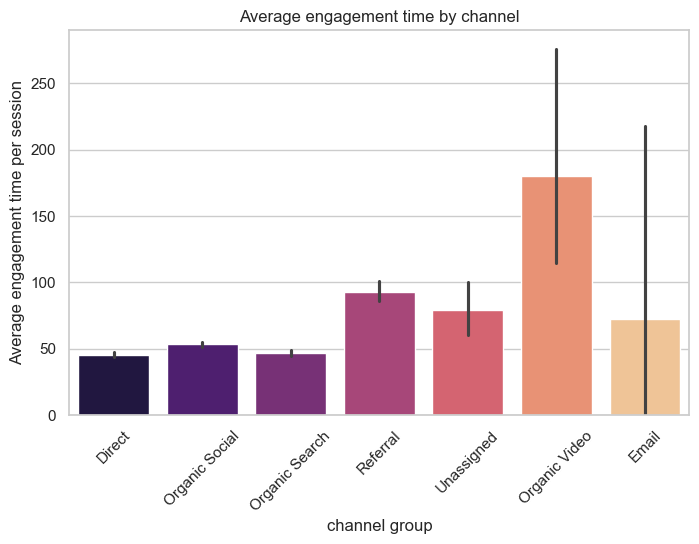

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, hue="channel group", palette="magma")
plt.title("Average engagement time by channel")
plt.xticks(rotation=45)
plt.show()

#High engagement from the organic video channel and from referral channel tells us that the contents is not just attracting visitors—but the right ones. similarly by engaging with other channels like email,direct,social r search enhances furthur the website engagement rate.


#4. How does engagement rate vary across different traffic channels?

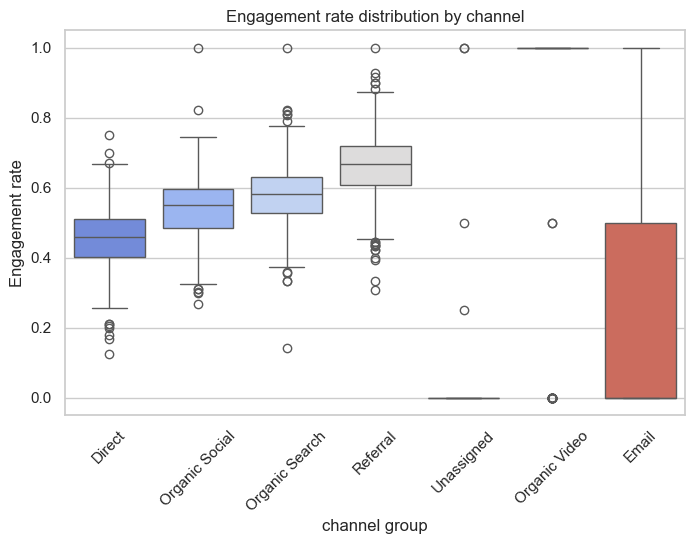

In [29]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", hue="channel group", palette="coolwarm")
plt.title("Engagement rate distribution by channel")
plt.xticks(rotation=45)
plt.show()

#. Key insights:
#a). Referral traffic is best performer : high median engagement + less spread --> reliable channel.
#b). Organic search is strong and consistent : showing good result of SEO.
#c). email AND direct channels has more variations : here, intent of user is not clear(some users bounce, some stay)
#d). has to work with unassigned channels : here, engagement rate is zero r may not be tracking source properly.

#5. which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?


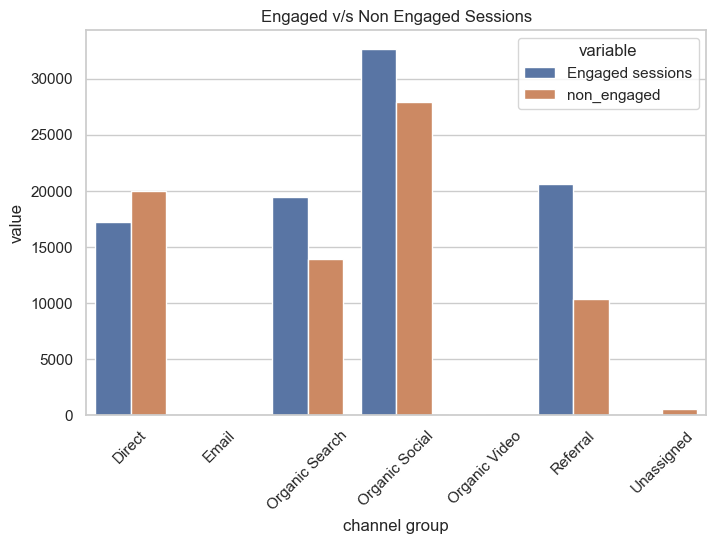

In [31]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["non_engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(id_vars="channel group", value_vars = ["Engaged sessions", "non_engaged"])

plt.figure(figsize=(8,5))
sns.barplot(data=session_df_melted, x="channel group", y="value", hue="variable")
plt.title("Engaged v/s Non Engaged Sessions")
plt.xticks(rotation=45)
plt.show()


#6. At what hours of the day does each channel drive the most traffic?

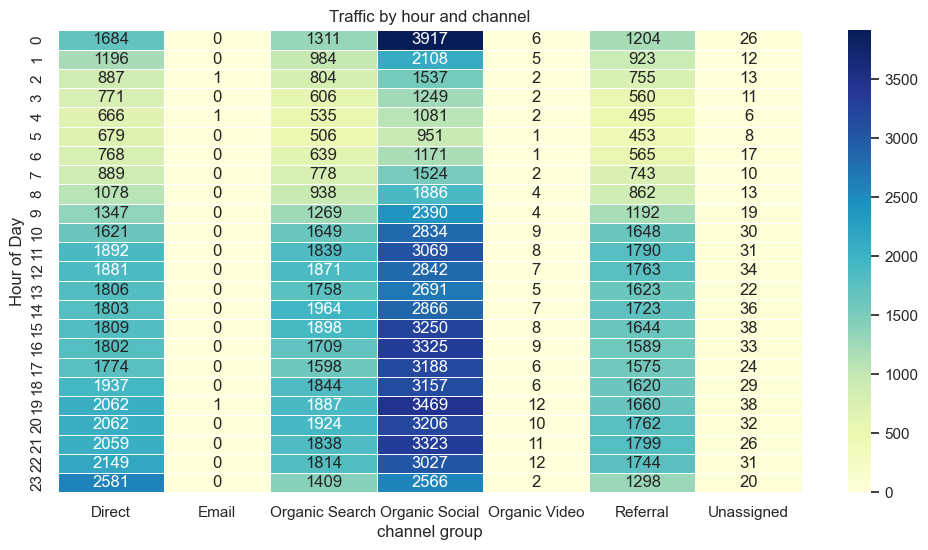

In [32]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
sns.heatmap(data=heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt='.0f')
plt.title("Traffic by hour and channel")
plt.xlabel("channel group")
plt.ylabel("Hour of Day")
plt.show()



#key insight: highest traffic from organic social channel around 12am

#7. Is there any correlation between high traffic (sessions) and high engagement rate over time?

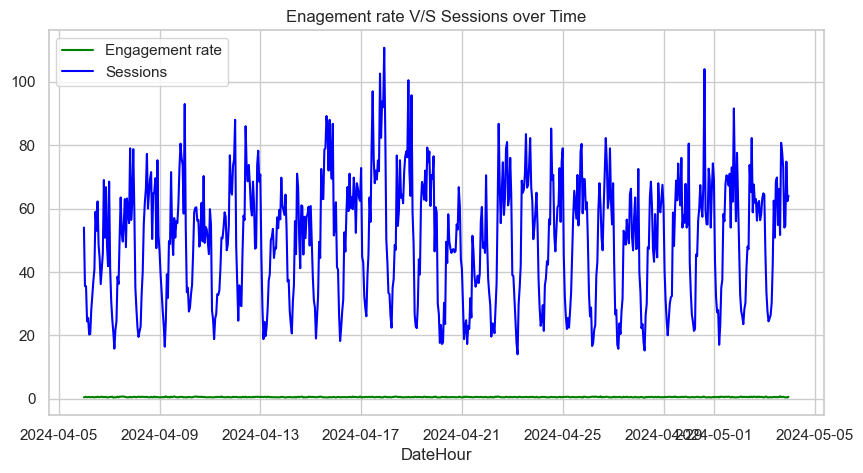

In [33]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()
plt.figure(figsize = (10, 5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["DateHour"], df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Enagement rate V/S Sessions over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()



#key insight: engagement rate is too low when compared to number of Sessions.